# 학습 목표

- 활성화 함수
- 손실함수
- 오차역전파
- 경사하강법

# 활성화 함수

- 이전층의 층의 값을 다음으로 비선형 변환을 해서 전달하는 함수
  - 실제 뉴런의 구조가 비선형으로 동작하기 때문에
  - 경험적으로 비선형 변환을 쓰는 것이 신경망 동작이 더 잘 되었음

- 종류 : sigmoid (입력, 은닉, 출력), tanh, relu (입력, 은닉), softmax (출력) 등  

## sigmoid 함수 만들기

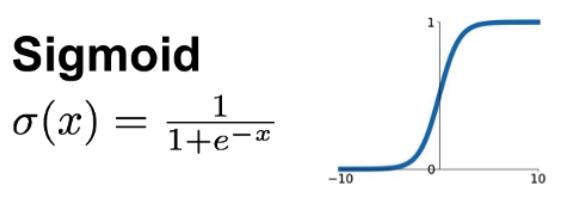

(-0.1, 1.1)

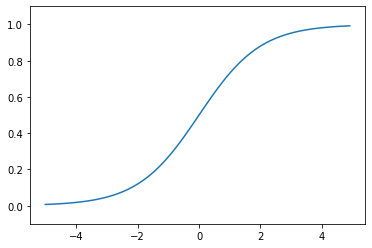

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid_fun(x) :
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid_fun(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)

### sigmoid 미분

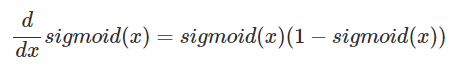

(-0.1, 1.1)

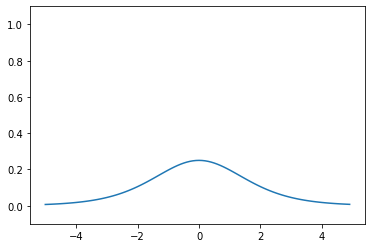

In [ ]:
def d_sigmoid_fun(x) :
  return sigmoid_fun(x) * (1 - sigmoid_fun(x))

x = np.arange(-5.0, 5.0, 0.1)
y = d_sigmoid_fun(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  

# 최대값이 0.25
# 오차역전파 시 활성화함수를 미분해서 곱하는데 층이 많아지면 활성화함수의 곱이 
# 0에 가까워져서 파라미터를 업데이트하지 못하는 문제가 발생
# vanishing gradient (기울기 소실)

## tanh 함수

- sigmoid의 문제점을 해결하기 위한 대안

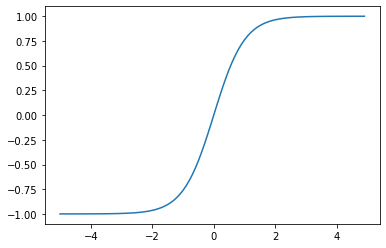

In [ ]:
# tanh 함수
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x, y)
# -1부터 1까지의 범위 값을 가진다

### tanh 미분

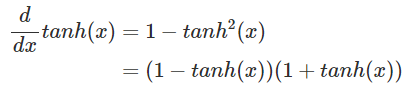

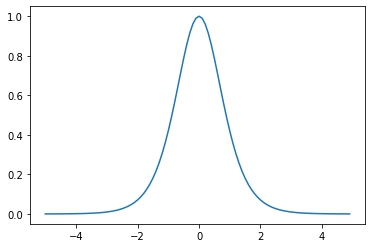

In [ ]:
def d_tanh(x) :
  return 1 - np.tanh(x) * np.tanh(x)

x = np.arange(-5.0, 5.0, 0.1)
y = d_tanh(x)

plt.plot(x, y)

# 최대값이 1이므로 sigmoid에 비해서 더 많이 곱할 수 있음
# 층이 깊어지면 0에 가까워짐

## relu 함수

- 0보다 작으면 0이고 0보다 크면 x인 함수

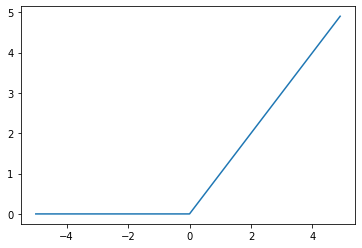

In [ ]:
def relu_fun(x) :
  # 0과 x 중에서 큰 값을 반환
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu_fun(x)

plt.plot(x, y)

## softmax 함수

- 원핫 인코딩된 이진분류나 다진분류의 출력층의 활성화함수로 사용

- 해당 출력들을 확률값으로 변환 (모든 출력의 합은 1이 된다)

# 손실함수 (Loss Function) : 비용함수
  - 오차를 구하는 함수 (공식)

  - 딥러닝의 오차역전파에서 미분을 하게되는게 오차나 정확도는 상수라서 미분을 하면 0이 되기때문에 함수형태로 사용  

  - 종류 : MSE(회귀), CEE (분류)
    - binary_crossentropy : 이진분류
    - categorical_crossentropy : 다진분류

### 평균제곱오차 (MSE : Mean Squared Error)

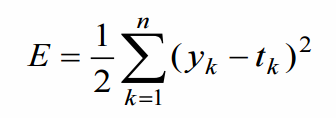

In [1]:
import numpy as np

# y : 예측값
# t : 실제값
# n : 데이터 갯수
def mse_fun(y, t, n) :
  return 0.5 * np.sum((y - t)**2)

# 예측값과 실제값이 일치하는 경우
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])    
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])  

print(f"MSE : {mse_fun(y, t, y.size)}")

MSE : 0.09750000000000003


In [2]:
# 예측값과 실제값이 일치하지 않는 경우
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])    
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])

print(f"MSE : {mse_fun(y, t, y.size)}")

MSE : 0.5975


### 교차엔트로피 오차 (CEE : Cross Entropy Error)

- 분류에서 CEE를 사용하는 이유 : 정확도가 상수이므로 미분하면 0이 되어 오차역전파에 사용할 수 없음

- 분류에서 MSE를 쓰지 못하는 이유
  - MSE는 틀린 것에 더 비중을 두어서 계산 (한쪽 측면만 보고 계산) -> 2개 이상의 클래스를 판단하는 분류에서는 쓰기가 힘듬

  - 활성화 함수가 softmax를 쓰는 경우 mse를 같이 쓰는 경우 미분하면 output * (1 - output) 값이 포함 -> 출력이 1이나 0에 가까워지면 w, b를 갱신한 값이 0에 가까워져서 학습이 안되는 문제가 발생

  - CEE를 쓰면 2가지 문제가 해결됨

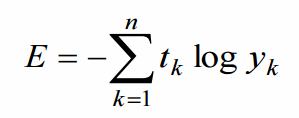  




In [4]:
def cee_fun(y, t, n) :
  # 1e-7 : log(0) 이 무한대가 되므로 y가 0이 되지 않도록 하기 위해서 아주 작은 값을 더해줌
  return -np.sum(t * np.log(y + 1e-7))

# 예측값과 실제값이 일치하는 경우
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])    
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])  

print(f"CEE : {cee_fun(y, t, y.size)}")  

CEE : 0.510825457099338


In [5]:
# 예측값과 실제값이 일치하지 않는 경우
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])    
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])

print(f"CEE : {cee_fun(y, t, y.size)}")  

CEE : 2.302584092994546


# 오차역전파

- 오차와 파라미터의 비를 구해서 기존의 파라미터 값을 갱신하는 방법 (갱신은 오차가 감소하는 경우에만 갱신 -> 경사하강법)


## 오차역전파 알고리즘

- (1) 파라미터 (w, b)를 초기화 (랜덤)
- (2) 특성데이터(X)를 입력해서 예측값 y를 계산
- (3) 예측값 y와 실제값 yt의 차이를 계산 -> 오차 (e)
- (4) 오차/파라미터의 비를 계산 (기울기, 미분)
- (5) 기존의 파라미터에 계산한 비를 더해주어 갱신 (단, 학습률만큼만 갱신)
    - 학습률을 쓰는 이유 : 값이 너무 크게 변하는 것을 방지
- (6) (2)-(5)까지를 epochs 만큼 반복    

### 1층으로 구성된 신경망 모델

In [9]:
import numpy as np

# 특성데이터, 라벨데이터, 반복수, 학습률
def fit_fun(X, y, epoch, lr) :
  #(1) 파라미터 (w, b)를 초기화 (랜덤)
  w = np.random.randn(1)
  b = np.random.randn(1)

  print(f"초기 파라미터 : w ({w}), b({b})")

  # (6) (2)-(5)까지를 epochs 만큼 반복
  for i in range(epoch) :
    #(2) 특성데이터(X)를 입력해서 예측값 y를 계산
    pred_y = w * X + b

    #(3) 예측값 y와 실제값 yt의 차이를 계산 -> 오차 (e)
    e = y - pred_y

    #(4) 오차/파라미터의 비를 계산 (기울기, 미분)
    dw = e / w
    db = e / b

    #(5) 기존의 파라미터에 계산한 비를 더해주어 갱신 (단, 학습률만큼만 갱신) - 학습
    w = w + lr * dw
    b = b + lr * db

    print(f"반복수 : {i}, 예측값 : {pred_y}, 오차 : {e}")
    print(f"갱신된 파라미터 : w ({w}), b({b})")

In [10]:
fit_fun(1, 3, 100, 0.01)

초기 파라미터 : w ([1.45601514]), b([1.03451527])
반복수 : 0, 예측값 : [2.49053041], 오차 : [0.50946959]
갱신된 파라미터 : w ([1.45951421]), b([1.03943999])
반복수 : 1, 예측값 : [2.4989542], 오차 : [0.5010458]
갱신된 파라미터 : w ([1.46294717]), b([1.04426033])
반복수 : 2, 예측값 : [2.5072075], 오차 : [0.4927925]
갱신된 파라미터 : w ([1.46631566]), b([1.04897939])
반복수 : 3, 예측값 : [2.51529505], 오차 : [0.48470495]
갱신된 파라미터 : w ([1.46962126]), b([1.05360012])
반복수 : 4, 예측값 : [2.52322138], 오차 : [0.47677862]
갱신된 파라미터 : w ([1.47286549]), b([1.05812535])
반복수 : 5, 예측값 : [2.53099084], 오차 : [0.46900916]
갱신된 파라미터 : w ([1.47604982]), b([1.0625578])
반복수 : 6, 예측값 : [2.53860763], 오차 : [0.46139237]
갱신된 파라미터 : w ([1.47917568]), b([1.06690009])
반복수 : 7, 예측값 : [2.54607577], 오차 : [0.45392423]
갱신된 파라미터 : w ([1.48224445]), b([1.07115469])
반복수 : 8, 예측값 : [2.55339914], 오차 : [0.44660086]
갱신된 파라미터 : w ([1.48525745]), b([1.07532403])
반복수 : 9, 예측값 : [2.56058148], 오차 : [0.43941852]
갱신된 파라미터 : w ([1.48821598]), b([1.07941042])
반복수 : 10, 예측값 : [2.5676264], 오차 : [0.4323

### 2층으로 구성된 신경망 모델

In [11]:
def fit_fun2(X, y, epoch, lr) :
  # (1) 파라미터 초기화
  w1 = np.random.randn(1)
  w2 = np.random.randn(1)
  b1 = np.random.randn(1)
  b2 = np.random.randn(1)

  # (6) (2) - (5)까지 반복
  for i in range(epoch) :
    # (2) 1층/2층 출력 계산
    pred_y1 = w1 * X + b1
    pred_y2 = w2 * pred_y1 + b2

    # (3) 오차 계산 - 2층 부터 계산
    e2 = y - pred_y2

    # (4) 2층에 대한 오차 역전파
    # 기울기
    dw2 = e2 / w2
    db2 = e2 / b2

    # 파라미터 갱신
    w2 = w2 + lr * dw2
    b2 = b2 + lr * db2

    # (5) 1층에 대한 오차 역전파
    # 기울기
    dw1 = pred_y1 * dw2 / w1
    db1 = pred_y1 * db2 / b1

    # 파라미터 갱신
    w1 = w1 + lr * dw1
    b1 = b1 + lr * db1

    print(f"반복수 : {i}, 예측값 : {pred_y2}, 오차 : {e2}")

In [13]:
fit_fun2(1, 3, 100, 0.01)

반복수 : 0, 예측값 : [-0.08063692], 오차 : [3.08063692]
반복수 : 1, 예측값 : [0.10376537], 오차 : [2.89623463]
반복수 : 2, 예측값 : [0.10799597], 오차 : [2.89200403]
반복수 : 3, 예측값 : [0.09182371], 오차 : [2.90817629]
반복수 : 4, 예측값 : [0.05872327], 오차 : [2.94127673]
반복수 : 5, 예측값 : [0.00746611], 오차 : [2.99253389]
반복수 : 6, 예측값 : [-0.0679769], 오차 : [3.0679769]
반복수 : 7, 예측값 : [-0.18613078], 오차 : [3.18613078]
반복수 : 8, 예측값 : [-0.45173916], 오차 : [3.45173916]
반복수 : 9, 예측값 : [-0.24903061], 오차 : [3.24903061]
반복수 : 10, 예측값 : [-1.24445016], 오차 : [4.24445016]
반복수 : 11, 예측값 : [-1.28957228], 오차 : [4.28957228]
반복수 : 12, 예측값 : [-1.33490726], 오차 : [4.33490726]
반복수 : 13, 예측값 : [-1.38060555], 오차 : [4.38060555]
반복수 : 14, 예측값 : [-1.42681919], 오차 : [4.42681919]
반복수 : 15, 예측값 : [-1.47370407], 오차 : [4.47370407]
반복수 : 16, 예측값 : [-1.52142209], 오차 : [4.52142209]
반복수 : 17, 예측값 : [-1.57014333], 오차 : [4.57014333]
반복수 : 18, 예측값 : [-1.6200484], 오차 : [4.6200484]
반복수 : 19, 예측값 : [-1.67133096], 오차 : [4.67133096]
반복수 : 20, 예측값 : [-1.72420063], 오차 : [4.